In [201]:
import pandas as pd
class Data_Getter:
    

    def __init__(self):
        self.training_file='Documents/Training_FileFromDB/InputFile.csv'
       

    def get_data(self):
      
        print('Entered the get_data method of the Data_Getter class')
        try:
            self.data= pd.read_csv(self.training_file) # reading the data file
            print('Data Load Successful.Exited the get_data method of the Data_Getter class')
            return self.data
        except Exception as e:
            print('Exception occured in get_data method of the Data_Getter class. Exception message: '+str(e))
            print('Data Load Unsuccessful.Exited the get_data method of the Data_Getter class')
            raise Exception()


In [202]:
import pickle
import os
import shutil
import pandas as pd


class File_Operation:
  
    def __init__(self):
       
        self.model_directory='models/'

    def save_model(self,model,filename):

        print( 'Entered the save_model method of the File_Operation class')
        try:
            path = os.path.join(self.model_directory,filename) 
            if os.path.isdir(path):
                shutil.rmtree(self.model_directory)
                os.makedirs(path)
            else:
                os.makedirs(path) #
            with open(path +'/' + filename+'.sav',
                      'wb') as f:
                pickle.dump(model, f)
            print('Model File '+filename+' saved. Exited the save_model method of the Model_Finder class')

            return 'success'
        except Exception as e:
            print('Exception occured in save_model method of the Model_Finder class. Exception message:  ' + str(e))
            print('Model File '+filename+' could not be saved. Exited the save_model method of the Model_Finder class')
            raise Exception()

    def load_model(self,filename):

   
        print( 'Entered the load_model method of the File_Operation class')
        try:
            with open(self.model_directory + filename + '/' + filename + '.sav',
                      'rb') as f:
                print('Model File ' + filename + ' loaded. Exited the load_model method of the Model_Finder class')
                return pickle.load(f)
        except Exception as e:
            print('Exception occured in load_model method of the Model_Finder class. Exception message:  ' + str(
                                       e))
            print('Model File ' + filename + ' could not be saved. Exited the load_model method of the Model_Finder class')
            raise Exception()

    def find_correct_model_file(self,cluster_number):
    
        print( 'Entered the find_correct_model_file method of the File_Operation class')
        try:
            self.cluster_number= cluster_number
            self.folder_name=self.model_directory
            self.list_of_model_files = []
            self.list_of_files = os.listdir(self.folder_name)
            for self.file in self.list_of_files:
                try:
                    if (self.file.index(str( self.cluster_number))!=-1):
                        self.model_name=self.file
                except:
                    continue
            self.model_name=self.model_name.split('.')[0]
            ('Exited the find_correct_model_file method of the Model_Finder class.')
            return self.model_name
        except Exception as e:
            print('Exception occured in find_correct_model_file method of the Model_Finder class. Exception message:  ' + str(
                                       e))
            print('Exited the find_correct_model_file method of the Model_Finder class with Failure')
            raise Exception()

In [203]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler




class Preprocessor:
  
           

    def __init__(self):
        pass
        

    def remove_columns(self,data,columns):
       
        print( 'Entered the remove_columns method of the Preprocessor class')
        self.data=data
        self.columns=columns
        try:
            self.useful_data=self.data.drop(labels=self.columns, axis=1) # drop the labels specified in the columns
            print( 'Column removal Successful.Exited the remove_columns method of the Preprocessor class')
            return self.useful_data
        except Exception as e:
            print('Exception occured in remove_columns method of the Preprocessor class. Exception message:  '+str(e))
            print('Column removal Unsuccessful. Exited the remove_columns method of the Preprocessor class')
            raise Exception()

    def separate_label_feature(self, data, label_column_name):
       
        print( 'Entered the separate_label_feature method of the Preprocessor class')
        try:
            self.X=data.drop(labels=label_column_name,axis=1) # drop the columns specified and separate the feature columns
            self.Y=data[label_column_name] # Filter the Label columns
            print('Label Separation Successful. Exited the separate_label_feature method of the Preprocessor class')
            return self.X,self.Y
        except Exception as e:
            print('Exception occured in separate_label_feature method of the Preprocessor class. Exception message:  ' + str(e))
            print( 'Label Separation Unsuccessful. Exited the separate_label_feature method of the Preprocessor class')
            raise Exception()

    def dropUnnecessaryColumns(self,data,columnNameList):
 
        data = data.drop(columnNameList,axis=1)
        return data


    def replaceInvalidValuesWithNull(self,data):

        

        for column in data.columns:
            count = data[column][data[column] == '?'].count()
            if count != 0:
                data[column] = data[column].replace('?', np.nan)
        return data

    def is_null_present(self,data):
       
        print( 'Entered the is_null_present method of the Preprocessor class')
        self.null_present = False
        self.cols_with_missing_values=[]
        self.cols = data.columns
        try:
            self.null_counts=data.isna().sum() 
            for i in range(len(self.null_counts)):
                if self.null_counts[i]>0:
                    self.null_present=True
                    self.cols_with_missing_values.append(self.cols[i])
            if(self.null_present): 
                self.dataframe_with_null = pd.DataFrame()
                self.dataframe_with_null['columns'] = data.columns
                self.dataframe_with_null['missing values count'] = np.asarray(data.isna().sum())
                self.dataframe_with_null.to_csv('preprocessing_data/null_values.csv') 
            print('Finding missing values is a success.Data written to the null values file. Exited the is_null_present method of the Preprocessor class')
            return self.null_present, self.cols_with_missing_values
        except Exception as e:
            print('Exception occured in is_null_present method of the Preprocessor class. Exception message:  ' + str(e))
            print('Finding missing values failed. Exited the is_null_present method of the Preprocessor class')
            raise Exception()

    def encodeCategoricalValues(self,data):
    
     data["class"] = data["class"].map({'p': 1, 'e': 2})

     for column in data.drop(['class'],axis=1).columns:
            data = pd.get_dummies(data, columns=[column])

     return data

    def scale_numerical_columns(self,data):
       
        print('Entered the scale_numerical_columns method of the Preprocessor class')

        self.data=data
        self.num_df = self.data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Years']]

        try:

            self.scaler = StandardScaler()
            self.scaled_data = self.scaler.fit_transform(self.num_df)
            self.scaled_num_df = pd.DataFrame(data=self.scaled_data, columns=self.num_df.columns,index=self.data.index)
            self.data.drop(columns=self.scaled_num_df.columns, inplace=True)
            self.data = pd.concat([self.scaled_num_df, self.data], axis=1)

            print( 'scaling for numerical values successful. Exited the scale_numerical_columns method of the Preprocessor class')
            return self.data
        except Exception as e:
            print('Exception occured in scale_numerical_columns method of the Preprocessor class. Exception message:  ' + str(e))
            print( 'scaling for numerical columns Failed. Exited the scale_numerical_columns method of the Preprocessor class')
            raise Exception()

    def encodeCategoricalValuesPrediction(self,data):
       

        for column in data.columns:
            data = pd.get_dummies(data, columns=[column])

        return data

   

    def standardScalingData(self,X):

        scalar = StandardScaler()
        X_scaled = scalar.fit_transform(X)

        return X_scaled

    def logTransformation(self,X):

        for column in X.columns:
            X[column] += 1
            X[column] = np.log(X[column])

        return X


    def impute_missing_values(self, data):
       
        print( 'Entered the impute_missing_values method of the Preprocessor class')
        self.data= data
        try:
            imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
            self.new_array=imputer.fit_transform(self.data) 
            
            self.new_data=pd.DataFrame(data=(self.new_array), columns=self.data.columns)
            print( 'Imputing missing values Successful. Exited the impute_missing_values method of the Preprocessor class')
            return self.new_data
        except Exception as e:
            print('Exception occured in impute_missing_values method of the Preprocessor class. Exception message:  ' + str(e))
            print('Imputing missing values failed. Exited the impute_missing_values method of the Preprocessor class')
            raise Exception()

    def get_columns_with_zero_std_deviation(self,data):
        
        print('Entered the get_columns_with_zero_std_deviation method of the Preprocessor class')
        self.columns=data.columns
        self.data_n = data.describe()
        self.col_to_drop=[]
        try:
            for x in self.columns:
                if (self.data_n[x]['std'] == 0): 
                    self.col_to_drop.append(x) 
            print( 'Column search for Standard Deviation of Zero Successful. Exited the get_columns_with_zero_std_deviation method of the Preprocessor class')
            return self.col_to_drop

        except Exception as e:
            print('Exception occured in get_columns_with_zero_std_deviation method of the Preprocessor class. Exception message:  ' + str(e))
            print( 'Column search for Standard Deviation of Zero Failed. Exited the get_columns_with_zero_std_deviation method of the Preprocessor class')
            raise Exception

In [204]:
!pip install kneed 

In [205]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
import pandas as pd


class KMeansClustering:
    

    def __init__(self):
        pass

    def elbow_plot(self,data):
       
             
        print( 'Entered the elbow_plot method of the KMeansClustering class')
        wcss=[] 
        try:
            for i in range (1,11):
                kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) 
                kmeans.fit(data) 
                wcss.append(kmeans.inertia_)
            plt.plot(range(1,11),wcss) 
            plt.title('The Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
            
            self.kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
            print( 'The optimum number of clusters is: '+str(self.kn.knee)+' . Exited the elbow_plot method of the KMeansClustering class')
            return self.kn.knee

        except Exception as e:
            print('Exception occured in elbow_plot method of the KMeansClustering class. Exception message:  ' + str(e))
            print('Finding the number of clusters failed. Exited the elbow_plot method of the KMeansClustering class')
            raise Exception()

    def create_clusters(self,data,number_of_clusters):
       
        print( 'Entered the create_clusters method of the KMeansClustering class')
        self.data=data
        try:
            self.kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
            print(self.kmeans)
            
            self.y_kmeans=self.kmeans.fit_predict(data) 

            
            self.file_op = File_Operation()
            self.save_model = self.file_op.save_model(self.kmeans, 'Kmeans')                                                                       # passing 'Model' as the functions need three parameters

            self.data['Cluster']=self.y_kmeans  
            print( 'succesfully created '+str(self.kn.knee)+ 'clusters. Exited the create_clusters method of the KMeansClustering class')
            return self.data
        except Exception as e:
            print('Exception occured in create_clusters method of the KMeansClustering class. Exception message:  ' + str(e))
            print('Fitting the data to clusters failed. Exited the create_clusters method of the KMeansClustering class')
            raise Exception()

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd

class Model_Finder:
   
    def __init__(self,):
        self.linearReg = LinearRegression()
        self.RandomForestReg = RandomForestRegressor()


    def get_best_params_for_Random_Forest_Regressor(self, train_x, train_y):
      
        print('Entered the RandomForestReg method of the Model_Finder class')
        try:
            
            self.param_grid_Random_forest_Tree = {
                                "n_estimators": [10,20,30],
                                "max_features": ["auto", "sqrt", "log2"],
                                "min_samples_split": [2,4,8],
                                "bootstrap": [True, False]
                                                     }

            
            self.grid = GridSearchCV(self.RandomForestReg, self.param_grid_Random_forest_Tree, verbose=3, cv=5)
            
            self.grid.fit(train_x, train_y)

           
            self.n_estimators = self.grid.best_params_['n_estimators']
            self.max_features = self.grid.best_params_['max_features']
            self.min_samples_split = self.grid.best_params_['min_samples_split']
            self.bootstrap = self.grid.best_params_['bootstrap']

            
            self.decisionTreeReg = RandomForestRegressor(n_estimators=self.n_estimators, max_features=self.max_features,
                                                         min_samples_split=self.min_samples_split, bootstrap=self.bootstrap)
            
            self.decisionTreeReg.fit(train_x, train_y)
            print('RandomForestReg best params: ' + str(
                                       self.grid.best_params_) + '. Exited the RandomForestReg method of the Model_Finder class')
            return self.decisionTreeReg
        except Exception as e:
            print( 'Exception occured in RandomForestReg method of the Model_Finder class. Exception message:  ' + str(
                                       e))
            print('RandomForestReg Parameter tuning  failed. Exited the knn method of the Model_Finder class')
            raise Exception()

    def get_best_params_for_linearReg(self,train_x,train_y):

     
        print('Entered the get_best_params_for_linearReg method of the Model_Finder class')
        try:
            
            self.param_grid_linearReg = {
                'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]

            }
            
            self.grid= GridSearchCV(self.linearReg,self.param_grid_linearReg, verbose=3,cv=5)
            
            self.grid.fit(train_x, train_y)

            
            self.fit_intercept = self.grid.best_params_['fit_intercept']
            self.normalize = self.grid.best_params_['normalize']
            self.copy_X = self.grid.best_params_['copy_X']

            
            self.linReg = LinearRegression(fit_intercept=self.fit_intercept,normalize=self.normalize,copy_X=self.copy_X)
            
            self.linReg.fit(train_x, train_y)
            print('LinearRegression best params: ' + str(
                                       self.grid.best_params_) + '. Exited the get_best_params_for_linearReg method of the Model_Finder class')
            return self.linReg
        except Exception as e:
            print('Exception occured in get_best_params_for_linearReg method of the Model_Finder class. Exception message:  ' + str(
                                       e))
            print('LinearReg Parameter tuning  failed. Exited the get_best_params_for_linearReg method of the Model_Finder class')
            raise Exception()


    def get_best_model(self,train_x,train_y,test_x,test_y):
       
        print('Entered the get_best_model method of the Model_Finder class')
       
        try:

            self.LinearReg= self.get_best_params_for_linearReg(train_x, train_y)
            self.prediction_LinearReg = self.LinearReg.predict(test_x) 
            self.LinearReg_error = r2_score(test_y,self.prediction_LinearReg)
            print(self.LinearReg_error)


         
            self.randomForestReg = self.get_best_params_for_Random_Forest_Regressor(train_x, train_y)
            self.prediction_randomForestReg = self.randomForestReg.predict(test_x) 
            self.prediction_randomForestReg_error = r2_score(test_y,self.prediction_randomForestReg)
            print(self.prediction_randomForestReg_error)

            
            if(self.LinearReg_error <  self.prediction_randomForestReg_error):
                return 'RandomForestRegressor',self.randomForestReg
            else:
                return 'LinearRegression',self.LinearReg_error

        except Exception as e:
            print('Exception occured in get_best_model method of the Model_Finder class. Exception message:  ' + str(
                                       e))
            print('Model Selection Failed. Exited the get_best_model method of the Model_Finder class')
            raise Exception()



In [ ]:
import pandas as pd

class Data_Getter_Pred:

    def __init__(self):
        self.prediction_file='Documents/Prediction_FileFromDB/InputFile.csv'
        
    def get_data(self):
     
        print('Entered the get_data method of the Data_Getter class')
        try:
            self.data= pd.read_csv(self.prediction_file) 
            print('Data Load Successful.Exited the get_data method of the Data_Getter class')
            return self.data
        except Exception as e:
            print('Exception occured in get_data method of the Data_Getter class. Exception message: '+str(e))
            print(
                                   'Data Load Unsuccessful.Exited the get_data method of the Data_Getter class')
            raise Exception()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler




class Preprocessor:
   

    def __init__(self):
           pass

    def remove_columns(self,data,columns):
       
        print('Entered the remove_columns method of the Preprocessor class')
        self.data=data
        self.columns=columns
        try:
            self.useful_data=self.data.drop(labels=self.columns, axis=1) 
            print('Column removal Successful.Exited the remove_columns method of the Preprocessor class')
            return self.useful_data
        except Exception as e:
            print('Exception occured in remove_columns method of the Preprocessor class. Exception message:  '+str(e))
            print('Column removal Unsuccessful. Exited the remove_columns method of the Preprocessor class')
            raise Exception()

    def separate_label_feature(self, data, label_column_name):
       
        print( 'Entered the separate_label_feature method of the Preprocessor class')
        try:
            self.X=data.drop(labels=label_column_name,axis=1) 
            self.Y=data[label_column_name] 
            print('Label Separation Successful. Exited the separate_label_feature method of the Preprocessor class')
            return self.X,self.Y
        except Exception as e:
            print('Exception occured in separate_label_feature method of the Preprocessor class. Exception message:  ' + str(e))
            print( 'Label Separation Unsuccessful. Exited the separate_label_feature method of the Preprocessor class')
            raise Exception()

    def dropUnnecessaryColumns(self,data,columnNameList):
       
        data = data.drop(columnNameList,axis=1)
        return data


    def replaceInvalidValuesWithNull(self,data):

       

        for column in data.columns:
            count = data[column][data[column] == '?'].count()
            if count != 0:
                data[column] = data[column].replace('?', np.nan)
        return data

    def is_null_present(self,data):
        
        print( 'Entered the is_null_present method of the Preprocessor class')
        self.null_present = False
        self.cols_with_missing_values=[]
        self.cols = data.columns
        try:
            self.null_counts=data.isna().sum() 
            for i in range(len(self.null_counts)):
                if self.null_counts[i]>0:
                    self.null_present=True
                    self.cols_with_missing_values.append(self.cols[i])
            if(self.null_present): 
                self.dataframe_with_null = pd.DataFrame()
                self.dataframe_with_null['columns'] = data.columns
                self.dataframe_with_null['missing values count'] = np.asarray(data.isna().sum())
                self.dataframe_with_null.to_csv('preprocessing_data/null_values.csv') # storing the null column information to file
            print('Finding missing values is a success.Data written to the null values file. Exited the is_null_present method of the Preprocessor class')
            return self.null_present, self.cols_with_missing_values
        except Exception as e:
            print('Exception occured in is_null_present method of the Preprocessor class. Exception message:  ' + str(e))
            print('Finding missing values failed. Exited the is_null_present method of the Preprocessor class')
            raise Exception()

    def encodeCategoricalValues(self,data):
    
     data["class"] = data["class"].map({'p': 1, 'e': 2})

     for column in data.drop(['class'],axis=1).columns:
            data = pd.get_dummies(data, columns=[column])

     return data

    def scale_numerical_columns(self,data):
       
        print('Entered the scale_numerical_columns method of the Preprocessor class')

        self.data=data
        self.num_df = self.data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Years']]

        try:

            self.scaler = StandardScaler()
            self.scaled_data = self.scaler.fit_transform(self.num_df)
            self.scaled_num_df = pd.DataFrame(data=self.scaled_data, columns=self.num_df.columns,index=self.data.index)
            self.data.drop(columns=self.scaled_num_df.columns, inplace=True)
            self.data = pd.concat([self.scaled_num_df, self.data], axis=1)

            print('scaling for numerical values successful. Exited the scale_numerical_columns method of the Preprocessor class')
            return self.data
        except Exception as e:
            print('Exception occured in scale_numerical_columns method of the Preprocessor class. Exception message:  ' + str(e))
            print( 'scaling for numerical columns Failed. Exited the scale_numerical_columns method of the Preprocessor class')
            raise Exception()

    def encodeCategoricalValuesPrediction(self,data):
        

        for column in data.columns:
            data = pd.get_dummies(data, columns=[column])

        return data


    def standardScalingData(self,X):

        scalar = StandardScaler()
        X_scaled = scalar.fit_transform(X)

        return X_scaled

    def logTransformation(self,X):

        for column in X.columns:
            X[column] += 1
            X[column] = np.log(X[column])

        return X


    def impute_missing_values(self, data):
       
        print('Entered the impute_missing_values method of the Preprocessor class')
        self.data= data
        try:
            imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
            self.new_array=imputer.fit_transform(self.data) 
          
            self.new_data=pd.DataFrame(data=(self.new_array), columns=self.data.columns)
            print( 'Imputing missing values Successful. Exited the impute_missing_values method of the Preprocessor class')
            return self.new_data
        except Exception as e:
            print('Exception occured in impute_missing_values method of the Preprocessor class. Exception message:  ' + str(e))
            print('Imputing missing values failed. Exited the impute_missing_values method of the Preprocessor class')
            raise Exception()

    def get_columns_with_zero_std_deviation(self,data):
       
        print( 'Entered the get_columns_with_zero_std_deviation method of the Preprocessor class')
        self.columns=data.columns
        self.data_n = data.describe()
        self.col_to_drop=[]
        try:
            for x in self.columns:
                if (self.data_n[x]['std'] == 0): 
                    self.col_to_drop.append(x)  
            print( 'Column search for Standard Deviation of Zero Successful. Exited the get_columns_with_zero_std_deviation method of the Preprocessor class')
            return self.col_to_drop

        except Exception as e:
            print('Exception occured in get_columns_with_zero_std_deviation method of the Preprocessor class. Exception message:  ' + str(e))
            print( 'Column search for Standard Deviation of Zero Failed. Exited the get_columns_with_zero_std_deviation method of the Preprocessor class')
            raise Exception()

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
import pandas as pd
class trainModel:

    def __init__(self):
         pass
    def trainingModel(self):
        
        print( 'Start of Training')
        try:
            
            data_getter=Data_Getter()
            data=data_getter.get_data()

            preprocessor=Preprocessor()

           
            is_null_present,cols_with_missing_values=preprocessor.is_null_present(data)

           
            if(is_null_present):
                data=preprocessor.impute_missing_values(data)
                
           

            

            
            X, Y = preprocessor.separate_label_feature(data, label_column_name="Item_Outlet_Sales")
            
            cols_to_drop = ["Item_Identifier","Outlet_Identifier"]
            X=preprocessor.remove_columns(X,cols_to_drop)
            
            
            

            kmeans=KMeansClustering() 
            number_of_clusters=kmeans.elbow_plot(X)  

            
            X=kmeans.create_clusters(X,number_of_clusters)

            
            X['Labels']=Y

            
            list_of_clusters=X['Cluster'].unique()

            

            for i in list_of_clusters:
                cluster_data=X[X['Cluster']==i] 

                
                cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
                cluster_label= cluster_data['Labels']
                
                
                x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=36)

                x_train_scaled = preprocessor.scale_numerical_columns(x_train)
                x_test_scaled = preprocessor.scale_numerical_columns(x_test)

                model_finder=Model_Finder() 

                
                best_model_name,best_model=model_finder.get_best_model(x_train_scaled,y_train,x_test_scaled,y_test)

                
                file_op = File_Operation()
                save_model=file_op.save_model(best_model,best_model_name+str(i))
                print("model save successfully")

               
            
            print( 'Successful End of Training')
            
        except Exception:
            
            print( 'Unsuccessful End of Training')
            


Start of Training
Entered the get_data method of the Data_Getter class
Data Load Successful.Exited the get_data method of the Data_Getter class
Entered the is_null_present method of the Preprocessor class
Finding missing values is a success.Data written to the null values file. Exited the is_null_present method of the Preprocessor class
Entered the separate_label_feature method of the Preprocessor class
Label Separation Successful. Exited the separate_label_feature method of the Preprocessor class
Entered the remove_columns method of the Preprocessor class
Column removal Successful.Exited the remove_columns method of the Preprocessor class
Entered the elbow_plot method of the KMeansClustering class
The optimum number of clusters is: 3 . Exited the elbow_plot method of the KMeansClustering class
Entered the create_clusters method of the KMeansClustering class
KMeans(n_clusters=3, random_state=42)
Entered the save_model method of the File_Operation class
Model File Kmeans saved. Exited t

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[CV 5/5] END copy_X=True, fit_intercept=True, normalize=True; total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 2/5] END cop

[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_sam

[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=auto, min

[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqr

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[CV 3/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, normalize=False; total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 5/5] END

[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_sam

[CV 1/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 2/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 5/5] END bootstrap=False, max_features=auto, mi

[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqr

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[CV 1/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, normalize=True; total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, normalize=False; total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=True, normalize=True; total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=True, normalize=True; total time=   0.0s
[CV 3/5] EN

[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=sqrt, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=sqrt, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=log2, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_features=auto, 

[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=sqr

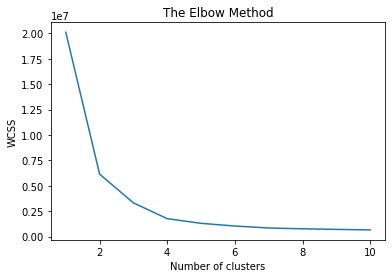

In [209]:
trainModelObj = trainModel() 
trainModelObj.trainingModel()

In [212]:
import pandas as pd

class prediction:

    def __init__(self):
        pass
        

    def predictionFromModel(self):

        try:
            
            print('Start of Prediction')
            data_getter=Data_Getter_Pred()
            data=data_getter.get_data()

          

            preprocessor=Preprocessor()

            is_null_present,cols_with_missing_values=preprocessor.is_null_present(data)
            if(is_null_present):
                data=preprocessor.impute_missing_values(data)

            
            cols_to_drop = ["Item_Identifier", "Outlet_Identifier"]
            data_useful = preprocessor.remove_columns(data, cols_to_drop)
            
            data_scaled = preprocessor.scale_numerical_columns(data_useful)

            file_loader=File_Operation()
            kmeans=file_loader.load_model('KMeans')
           
           
            
            
            clusters=kmeans.predict(data_scaled)
            data_scaled['clusters']=clusters
            clusters=data_scaled['clusters'].unique()
            result=[] 

            for i in clusters:
                cluster_data= data_scaled[data_scaled['clusters']==i]
                cluster_data = cluster_data.drop(['clusters'],axis=1)
                model_name = file_loader.find_correct_model_file(i)
                model = file_loader.load_model(model_name)
                for val in (model.predict(cluster_data.values)):
                    result.append(val)
            import pandas as pd
            result = pd.DataFrame(result,columns=['Predictions'])
            result['Item_Identifier']  = data["Item_Identifier"]
            result["Outlet_Identifier"] = data["Outlet_Identifier"]
            print(result)
            path="Desktop/Prediction_Output_File/Predictions"
            result.to_csv("Desktop/Prediction_Output_File/Predictions",header=True) 
            print('End of Prediction')
        except Exception as ex:
            print( 'Error occured while running the prediction!! Error:: %s' % ex)
            raise ex
        return path

            





In [213]:
preObj = prediction() 
preObj.predictionFromModel()

Start of Prediction
Entered the get_data method of the Data_Getter class
Data Load Successful.Exited the get_data method of the Data_Getter class
Entered the is_null_present method of the Preprocessor class
Finding missing values is a success.Data written to the null values file. Exited the is_null_present method of the Preprocessor class
Entered the remove_columns method of the Preprocessor class
Column removal Successful.Exited the remove_columns method of the Preprocessor class
Entered the scale_numerical_columns method of the Preprocessor class
scaling for numerical values successful. Exited the scale_numerical_columns method of the Preprocessor class
Entered the load_model method of the File_Operation class
Model File KMeans loaded. Exited the load_model method of the Model_Finder class
Entered the find_correct_model_file method of the File_Operation class
Entered the load_model method of the File_Operation class
Model File RandomForestRegressor0 loaded. Exited the load_model meth

'Desktop/Prediction_Output_File/Predictions'